In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
input_data = 'data00/1.csv'
trade_history_long = 'data02/trade_history_long.csv'
trade_history_short = 'data02/trade_history_short.csv'

In [3]:
def openTradeHistory():
    with open(trade_history_long, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["time", "type", "current", "reward", "risk", "close"])
        file.close()
        
    with open(trade_history_short, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["time", "type", "current", "reward", "risk", "close"])
        file.close()

In [4]:
def createTradeHistoryLong(trade_detail):
    with open(trade_history_long, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(trade_detail)
        file.close()

In [5]:
def createTradeHistoryShort(trade_detail):
    with open(trade_history_short, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(trade_detail)
        file.close()

In [6]:
def closeTrade(current_price):
    df_l = pd.read_csv(trade_history_long)
    for index_l, row_l in df_l.iterrows():
        if row_l['close'] != 0:
            continue
        if(row_l['reward'] <= current_price or row_l['risk'] >= current_price):
            df_l.loc[index_l, 'close'] = current_price
            
    df_l.to_csv(trade_history_long, index=False)
    
    df_s = pd.read_csv(trade_history_short)
    for index_s, row_s in df_s.iterrows():
        if row_s['close'] != 0:
            continue
        if(row_s['reward'] >= current_price or row_s['risk'] <= current_price):
            df_s.loc[index_s, 'close'] = current_price
            
    df_s.to_csv(trade_history_short, index=False)

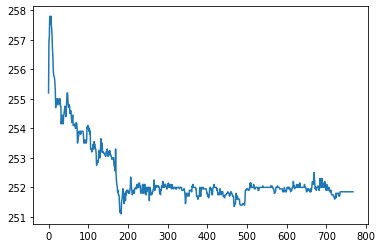

In [7]:
stockData = pd.Series([],dtype='float64') 
original_data = pd.read_csv(input_data)
ticker = original_data.iloc[:, 1]

plt.plot(ticker)

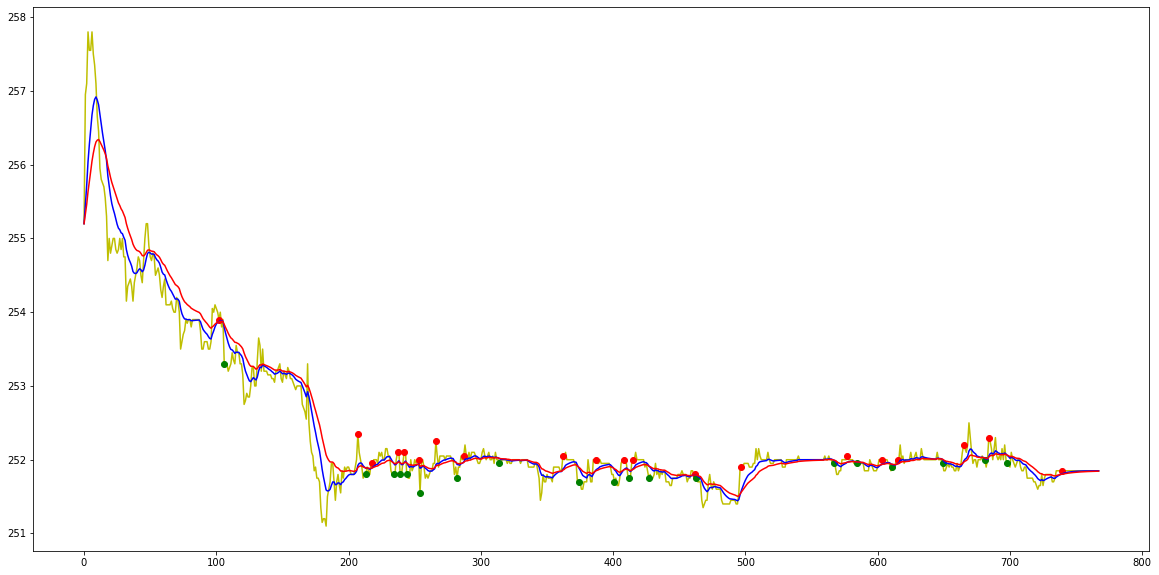

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(ticker, c='y')

openTradeHistory()
for val in ticker:
    closeTrade(val)
    stockData[len(stockData)] = val
    
    if len(stockData) > 50:
        shortWindow = stockData.ewm(span=12, adjust=False).mean()
        longWindow = stockData.ewm(span=26, adjust=False).mean()
        idx = len(stockData) - 1
        
        if shortWindow[idx-1] < longWindow[idx-1] and shortWindow[idx] >= longWindow[idx]:
            plt.plot(idx, val, c='r', marker='o') #Long
            createTradeHistoryLong([idx, "long", val, (val+0.5), (val-0.4), 0])
    
        if shortWindow[idx-1] > longWindow[idx-1] and shortWindow[idx] < longWindow[idx]:
            plt.plot(idx, val, c='g', marker='o') #short
            createTradeHistoryShort([idx, "short", val, (val-0.5), (val+0.4), 0])
            
plt.plot(shortWindow, c='b')
plt.plot(longWindow, c='r')

In [9]:
profit_l = 0.0
df_l = pd.read_csv(trade_history_long)
for index_l, row_l in df_l.iterrows():
    if row_l['close'] == 0:
        continue
    profit_l = profit_l + (row_l['close'] - row_l['current'])

print('profit by long {}',profit_l)

profit_s = 0.0
df_s = pd.read_csv(trade_history_short)
for index_s, row_s in df_s.iterrows():
    if row_s['close'] == 0:
        continue
    profit_s = profit_s + (row_s['current'] - row_s['close'])

print('profit by short {}',profit_s)

print('total profit{}',(profit_l+profit_s))

profit by long {} -6.25
profit by short {} -5.849999999999966
total profit{} -12.099999999999966
